In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load/kaggle/input/pse-isr-reddit-comments-4lac-csv/pse_isr_reddit_comments.csv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pse-isr-reddit-comments-4lac-csv/pse_isr_reddit_comments.csv


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
path_data="/kaggle/input/pse-isr-reddit-comments-4lac-csv/pse_isr_reddit_comments.csv"

In [4]:
df = pd.read_csv(path_data)
df

,comment_id,score,self_text,subreddit,created_time
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00
...,...,...,...,...,...
436720,k3sdwfc,42,US. This is bullshit,Palestine,2023-10-06 23:50:11+00:00
436721,k3sdixt,1,I am in the United States and it has the dotte...,Palestine,2023-10-06 23:47:23+00:00
436722,k3sccp2,54,In which country are you?\nSometimes maps adap...,Palestine,2023-10-06 23:38:26+00:00
436723,k3ritvj,116,You can't give up on something you only preten...,worldnews,2023-10-06 20:16:05+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436725 entries, 0 to 436724
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    436725 non-null  object
 1   score         436725 non-null  int64 
 2   self_text     436725 non-null  object
 3   subreddit     436725 non-null  object
 4   created_time  436725 non-null  object
dtypes: int64(1), object(4)
memory usage: 16.7+ MB


In [6]:
df['self_text'].isnull().sum( )

0

In [7]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time'], dtype='object')

In [8]:
df['self_text'] = df['self_text'] + ' and the confidence is ' + (df['score'] * 100).astype(str) + ' percent.'

In [9]:
for i in range(10):
    print(df.self_text[i])

Lol what kind of busted translator device you got. Does it speak only hasbara? and the confidence is 100 percent.
Translation:

Amen. Kill jews and continue gazan oppression! and the confidence is 100 percent.
Friendly fact reminder: Israel has been stealing Palestines land, bombing their civilians, controlling their access to water/food and kidnapping Palestinian civilians for over 50 years. Israel has  been committing genocide on Palestine but somehow people like you like to place the blame on Palestine. If you think Hamas is bad, I have some bad news about the IDF for you. and the confidence is 100 percent.
Well, i would never support Hamas, but there actions Israel could do that would make me stop supporting it: State orginized killing of Israeli or west bank Arabs or use of Atomic weaponary. and the confidence is 100 percent.
/u/TickeMeTendie. This is an automatic notice: 
'Nazis' Casual comments and analogies are inflammatory and therefor not allowed.  
We allow for exemptions fo

In [10]:
import zipfile
import os

zip_file_path = '/usr/share/nltk_data/corpora/wordnet.zip'
destination_directory = '/usr/share/nltk_data/corpora/'

# Check if the specific file exists in the destination directory
file_to_check = 'index.adv'
file_path_to_check = os.path.join(destination_directory, 'wordnet', file_to_check)

if not os.path.exists(file_path_to_check):
    # Unzip the entire archive if the specific file doesn't exist
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_directory)
    print(f"Successfully unzipped {zip_file_path} to {destination_directory}")
else:
    print(f"File {file_to_check} already exists. No need to unzip the archive.")

Successfully unzipped /usr/share/nltk_data/corpora/wordnet.zip to /usr/share/nltk_data/corpora/


In [11]:
# removing usernames from tweet
df['clean_text'] = df.self_text.str.replace("[@user]", " ")
df['clean_text'] = df.self_text.str.replace("[r'\W+]"," ")

In [12]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")
df['clean_text'] = df['clean_text'].str.replace("<br />", " ")
df['clean_text'] = df['clean_text'].str.replace("@[A-Za-z0-9]+", " ")
df['clean_text'] = df['clean_text'].str.replace("https?://[A-Za-z0-9./]+", " ")
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-z.!?'0-9]", " ")
df['clean_text'] = df['clean_text'].str.replace("\t", " ")
df['clean_text'] = df['clean_text'].str.replace(" +", " ")
df['clean_text'] = df['clean_text'].str.replace("br", " ")
df['clean_text'] = df['clean_text'].str.replace("<", " ")
df['clean_text'] = df['clean_text'].str.replace("/", " ")
df['clean_text'] = df['clean_text'].str.replace(">", " ")
df['clean_text'] = df['clean_text'].str.replace(";", " ")
df['clean_text'] = df['clean_text'].str.replace("&", " ")

In [13]:
df.head(5)

,comment_id,score,self_text,subreddit,created_time,clean_text
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,Lol what kind of busted translator device you ...
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,Translation:\n\nAmen. Kill jews and continue g...
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,Friendly fact reminder: Israel has been steali...
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,"Well, i would never support Hamas, but there a..."
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,u TickeMeTendie. This is an automatic notice:...


In [14]:
#tokenization
df['clean_text'] = df['clean_text'].apply(lambda x: str(x) if type(x) != str else x)
df['clean_text'] = df['clean_text'].apply(lambda x: x.split())
df.head()

,comment_id,score,self_text,subreddit,created_time,clean_text
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,"[Lol, what, kind, of, busted, translator, devi..."
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,"[Translation:, Amen., Kill, jews, and, continu..."
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,"[Friendly, fact, reminder:, Israel, has, been,..."
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,"[Well,, i, would, never, support, Hamas,, but,..."
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,"[u, TickeMeTendie., This, is, an, automatic, n..."


STEMMING AND LEMENTIZING

In [15]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df['clean_text']= df['clean_text'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,comment_id,score,self_text,subreddit,created_time,clean_text
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,"[lol, what, kind, of, bust, translat, devic, y..."
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,"[translation:, amen., kill, jew, and, continu,..."
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,"[friend, fact, reminder:, israel, has, been, s..."
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,"[well,, i, would, never, support, hamas,, but,..."
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,"[u, tickemetendie., this, is, an, automat, not..."


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')

In [18]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

In [19]:
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [20]:
df['clean_text'] = df['clean_text'].apply(process)
df.head()

,comment_id,score,self_text,subreddit,created_time,clean_text
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,"[got., devic, translat, confid, 100, speak, lo..."
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,"[gazan, kill, 100, jew, percent., oppression!,..."
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,"[like, reminder:, hama, israel, you., access, ..."
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,"[state, support, stop, orgin, israel, would, c..."
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,"[historians., r, concerns.*, simpl, bot, meani..."


In [21]:
#Visualizing the tokens
for i in range(10):
    print(df.clean_text[i])

['got.', 'devic', 'translat', 'confid', '100', 'speak', 'lol', 'onli', 'kind', 'percent.', 'bust', 'hasbara?', 'doe']
['gazan', 'kill', '100', 'jew', 'percent.', 'oppression!', 'confid', 'continu', 'amen.', 'translation:']
['like', 'reminder:', 'hama', 'israel', 'you.', 'access', 'confid', 'land,', 'bad,', '100', '50', 'friend', 'kidnap', 'bomb', 'somehow', 'palestinian', 'palestin', 'peopl', 'percent.', 'food', 'control', 'idf', 'think', 'civilian', 'commit', 'steal', 'blame', 'genocid', 'civilians,', 'news', 'years.', 'fact', 'water', 'place', 'bad', 'palestine.']
['state', 'support', 'stop', 'orgin', 'israel', 'would', 'confid', 'kill', '100', 'weaponary.', 'hamas,', 'bank', 'percent.', 'never', 'isra', 'well,', 'action', 'arab', 'west', 'atom', 'it:', 'use', 'could']
['historians.', 'r', 'concerns.*', 'simpl', 'bot', 'meaning', 'su', 'notice:', '*i', '[rule', 'eddit](', 'accept', 'must', 'messag', '[contact', 'automat', 'take', 'word', 'tickemetendie.', 'flag', '6](https:', 'bot,',

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436725 entries, 0 to 436724
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    436725 non-null  object
 1   score         436725 non-null  int64 
 2   self_text     436725 non-null  object
 3   subreddit     436725 non-null  object
 4   created_time  436725 non-null  object
 5   clean_text    436725 non-null  object
dtypes: int64(1), object(5)
memory usage: 20.0+ MB


Sentiment Analysis using VADER

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Assuming df['clean_text'] is a list of strings
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Declare variables for scores
scores = {
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

# Generate sentiment scores for Reddit comments
for comment in df['clean_text']:
    compound = analyzer.polarity_scores(comment)["compound"]
    pos = analyzer.polarity_scores(comment)["pos"]
    neu = analyzer.polarity_scores(comment)["neu"]
    neg = analyzer.polarity_scores(comment)["neg"]

    scores["Compound"].append(compound)
    scores["Positive"].append(pos)
    scores["Negative"].append(neg)
    scores["Neutral"].append(neu)

# Create a new DataFrame for sentiment scores
sentiments_score = pd.DataFrame(scores)

# Join the sentiment scores DataFrame with the original DataFrame
df = pd.concat([df, sentiments_score], axis=1)

In [24]:
df.head()

,comment_id,score,self_text,subreddit,created_time,clean_text,Compound,Positive,Negative,Neutral
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,got. devic translat confid 100 speak lol onli ...,0.7351,0.360,0.000,0.640
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,gazan kill 100 jew percent. oppression! confid...,-0.7177,0.000,0.357,0.643
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,like reminder: hama israel you. access confid ...,-0.8360,0.153,0.306,0.542
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,state support stop orgin israel would confid k...,-0.7196,0.089,0.287,0.625
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,historians. r concerns.* simpl bot meaning su ...,0.4826,0.085,0.024,0.891


In [25]:
# Define conditions for sentiment categories based on 'Compound' scores
# If Compound score is <= -0.5, classify as 'Negative'
# If Compound score is > -0.5 and < 0.5, classify as 'Neutral'
# If Compound score is >= 0.5, classify as 'Positive'
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
df['Category'] = np.select(conditions, values)

df.head()

,comment_id,score,self_text,subreddit,created_time,clean_text,Compound,Positive,Negative,Neutral,Category
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,got. devic translat confid 100 speak lol onli ...,0.7351,0.360,0.000,0.640,Positive
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,gazan kill 100 jew percent. oppression! confid...,-0.7177,0.000,0.357,0.643,Negative
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,like reminder: hama israel you. access confid ...,-0.8360,0.153,0.306,0.542,Negative
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,state support stop orgin israel would confid k...,-0.7196,0.089,0.287,0.625,Negative
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,historians. r concerns.* simpl bot meaning su ...,0.4826,0.085,0.024,0.891,Neutral


EDA

In [26]:
# Group the DataFrame by 'Category' and count the occurrences of each category
category_counts = df.groupby(['Category'])['Category'].count()

# Create a DataFrame with counts and rename the column to 'Counts'
counts_df = pd.DataFrame(category_counts).rename(columns={"Category": "Counts"})

# Calculate the percentage for each category and add it as a new column 'Percentage'
counts_df['Percentage'] = (counts_df['Counts'] / counts_df['Counts'].sum()) * 100

counts_df = counts_df.drop(index='0')

# Print or return the summary DataFrame
print(counts_df)

          Counts  Percentage
Category                    
Negative  120859   27.673937
Neutral   261709   59.925353
Positive   54146   12.398191


Pie Chart of Sentiment Counts

In [27]:
import plotly.express as px

# Create a Pie Chart using Plotly
fig = px.pie(counts_df, values='Counts', names=counts_df.index, 
             labels={'Category': 'Sentiment Category', 'Counts': 'Count'},
             title='Distribution of Sentiment Categories in Comments',
             hole=0.3, 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Set the background color of the Pie Chart to dark grey
fig.update_layout(paper_bgcolor='white')

# Show the Plotly Pie Chart
fig.show()

Positive Score Comments

In [28]:
# Select the top 10 comments with the highest 'Compound' scores from the DataFrame
top_10_pos_comments = df.nlargest(n=10, columns=['Compound'])["clean_text"]

# This line selects the top 50 comments based on their 'Compound' scores,
# indicating the 10 comments with the most positive sentiment.

print(top_10_pos_comments)

361366    ottoman, connaîtr express exclus immigration. ...
39798     countri like tie talk neighter made irigin afg...
95240     develop discussions. neutral diplomacy. contig...
61924     government nakba, polar cars, oppression. when...
211703    teachers, victims, rape dozen [so] morph that,...
158510    like young 2 talk taken valu ashkenazi, would ...
46569     like ones, young bold are. neat. polar hard, s...
136050    impli simplistic? correct uncurtail that, more...
364007    stay like they'v made aw would that, you, hamm...
281466    "emphas ironi "labor connect "support la vers ...
Name: clean_text, dtype: object


Negative Score Comments

In [29]:
# Select the top 10 comments with the highest 'Compound' scores from the DataFrame
top_10_neg_comments = df.nsmallest(n=10, columns=['Compound'])["clean_text"]

print(top_10_neg_comments)

210996    germans. truth demonstr certain statement anot...
287033    "both agreement unprovok pend mention jail fuc...
314078    rape dozen jew-free. mob infant greek non-aggr...
161115    impli whenev nationalist vacuum. fuck egypt, p...
343228    countri like citi shame 9 made dog onc etc. te...
96382     ak tortur flee, crossfire, traumat fresh mouth...
24864     war. sophist talk ukraine, areas, tri reason w...
24868     war. sophist talk ukraine, areas, tri reason w...
98456     war. sophist talk ukraine, areas, tri reason w...
32958     war. sophist talk ukraine, areas, tri reason w...
Name: clean_text, dtype: object


Comments With High Upvotes

In [30]:
# Sort the DataFrame by 'score' in descending order and select unique 'clean_text' values
top_10_high_score_comments = df.sort_values('score', ascending=False)['clean_text'].drop_duplicates().head(10)

# This line sorts the DataFrame by 'score' in descending order, 
# selects unique 'clean_text' values, and retrieves the top 50 comments 
# with the highest scores.
print(top_10_high_score_comments)

355485    no? netanyahu intellig 1646300 percent. pretti...
341434    taken total would enclave, sieg far gun gaza. ...
220023    1174200 either israel would that, confid affil...
54889     way odd 1164200 ask percent. change. confid regim
435128    veri ugli 1042100 east. percent. middl confid ...
429377               well. shit 1009000 percent. end confid
71376     impli known edit: everi includ present mean ta...
28778     respons live emerg would confid 899300 er time...
205179    edit: guaranteed, whenev check 885700 2: remem...
88547     made grievanc terror appal with. statement gri...
Name: clean_text, dtype: object


Comments With Low Upvotes

In [31]:
top_10_low_score_comments = df.sort_values('score', ascending=True)['clean_text'].drop_duplicates().head(10)
print(top_10_low_score_comments)

221507    5 hama strike came yeah saidnthey confid eithe...
436406    fire -93400 rockets. thousand percent. pretti ...
312415    target. once, proven percent. actual -76300 mi...
6730      kill -67300 peopl disgust percent. even biblic...
70019      yeah percent. dozen -63200 area. confid civilian
242531    target crime. also hit legal. percent. necessa...
113465    www.theguardian.com confid apr to. world 05 20...
436376    attack. taken hit israel reason approach confi...
160848    part accurate. -52100 racist percent. sexist. ...
221304    made would confid anyth becaus know -43800 per...
Name: clean_text, dtype: object


Visualization of the Sentiment Scores of Positive, Neutral & Negative Tweets

/tmp/ipykernel_26/4104462291.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be remov

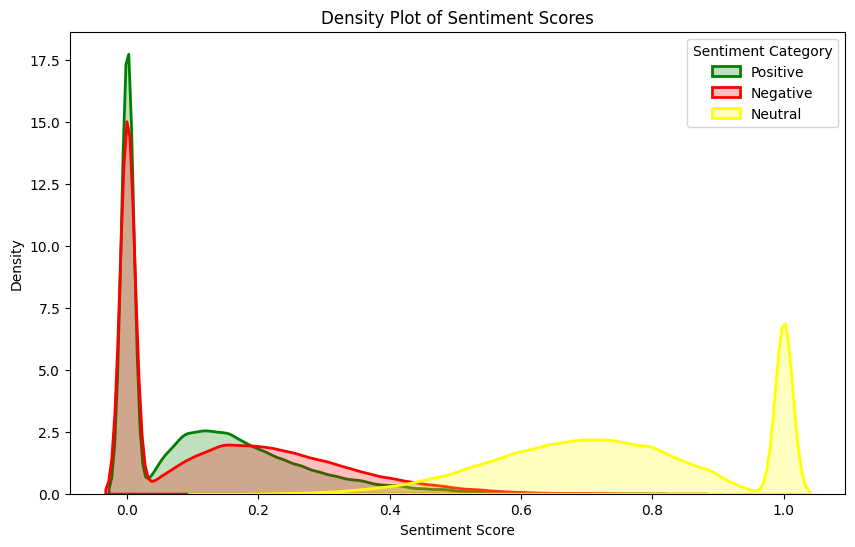

In [32]:
# Define the sentiment categories and corresponding colors
sentiment_categories = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'yellow']

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over sentiment categories and plot KDE
for category, color in zip(sentiment_categories, colors):
    sns.distplot(df[category], hist=False, kde=True,
                 bins=int(180/5), color=color,
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'shade': True, 'linewidth': 2}, label=category)

# Set plot labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()

Visualization of the sentiment score

/tmp/ipykernel_26/1808040337.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be remove

<Axes: xlabel='Compound', ylabel='Density'>

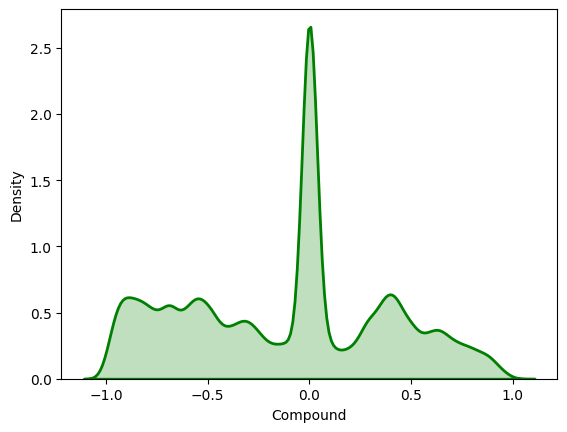

In [33]:
sns.distplot(df["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436725 entries, 0 to 436724
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   comment_id    436725 non-null  object 
 1   score         436725 non-null  int64  
 2   self_text     436725 non-null  object 
 3   subreddit     436725 non-null  object 
 4   created_time  436725 non-null  object 
 5   clean_text    436725 non-null  object 
 6   Compound      436725 non-null  float64
 7   Positive      436725 non-null  float64
 8   Negative      436725 non-null  float64
 9   Neutral       436725 non-null  float64
 10  Category      436725 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 36.7+ MB


Positive or Negative Bias Detection

In [35]:
# Calculate the average sentiment scores for each subreddit
subreddit_sentiment = df.groupby('subreddit')[['Positive', 'Negative']].mean()

# Calculate the difference between positive and negative sentiment scores
subreddit_sentiment['Bias'] = subreddit_sentiment['Positive'] - subreddit_sentiment['Negative']

# Determine the direction of bias: Positive, Negative, or Neutral
def determine_bias_direction(bias):
    if bias > 0.01:  # You can adjust this threshold based on your dataset
        return 'Positive'
    elif bias < -0.01:  # You can adjust this threshold based on your dataset
        return 'Negative'
    else:
        return 'Neutral'

subreddit_sentiment['Bias Direction'] = subreddit_sentiment['Bias'].apply(determine_bias_direction)

# Sort subreddits based on bias in descending order
most_biased_subreddits = subreddit_sentiment.sort_values(by='Bias', ascending=False)

# Print or view the most biased subreddits with bias direction
print(most_biased_subreddits)

                       Positive  Negative      Bias Bias Direction
subreddit                                                         
AbruptChaos            0.111277  0.098473  0.012804       Positive
NonCredibleDefense     0.100766  0.107463 -0.006697        Neutral
CrazyFuckingVideos     0.103537  0.118739 -0.015201       Negative
Palestine              0.116285  0.133592 -0.017307       Negative
AskMiddleEast          0.111833  0.133032 -0.021198       Negative
IsraelPalestine        0.112587  0.138679 -0.026092       Negative
worldnews              0.108702  0.136850 -0.028148       Negative
CombatFootage          0.102937  0.137650 -0.034713       Negative
TerrifyingAsFuck       0.107607  0.148206 -0.040599       Negative
ActualPublicFreakouts  0.110174  0.151761 -0.041588       Negative
PublicFreakout         0.103171  0.147179 -0.044007       Negative
worldnewsvideo         0.103719  0.148404 -0.044685       Negative
IsrealPalestineWar_23  0.109823  0.167323 -0.057500       Nega

In [36]:
df.shape

(436725, 11)

In [37]:
df_no_nan = df.dropna(subset=['clean_text'])

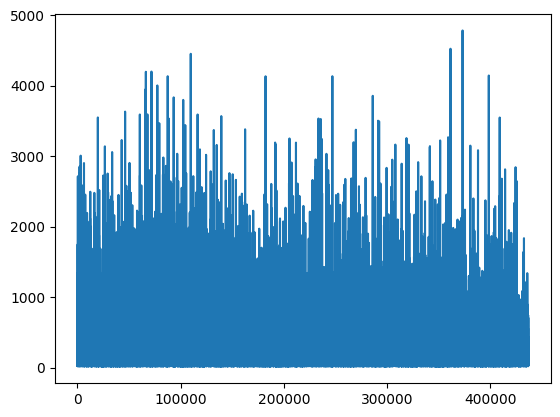

In [38]:
# Plotting word lenghts of tweets
word_length = [len(x) for x in df['clean_text']]
plt.plot(word_length)

In [39]:
# Converting sentences to string
df['clean_text'] = df['clean_text'].astype(str)

In [40]:
# Assuming df is your DataFrame
df = df[df['Category'] != '0']

In [41]:
# Types of products
df['Category'].value_counts()

Category
Neutral     261709
Negative    120859
Positive     54146
Name: count, dtype: int64

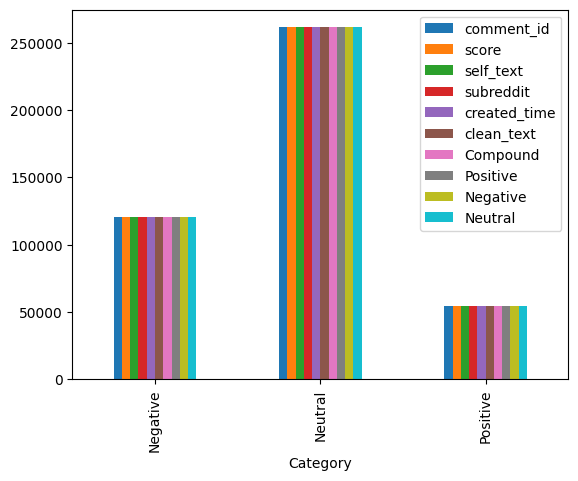

In [42]:
# Plotting product value counts
df.groupby('Category').count().plot(kind='bar')
plt.show()

In [43]:
# Step 3: Topic Modeling
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1)  # Assuming 5 topics
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Topic Modelling

In [44]:
# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
n_top_words = 10  # You can adjust this number to display more or fewer words per topic
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Print the topics and associated words
for topic_idx, top_words in enumerate(top_words_per_topic):
    print(f"Topic #{topic_idx + 1}:")
    print(", ".join(top_words))
    print()

Topic #1:
percent, confid, 100, https, 200, video, 500, com, 300, thank

Topic #2:
percent, confid, hama, 100, israel, gaza, bomb, civilian, rocket, 200

Topic #3:
percent, confid, 100, israel, peopl, hama, palestinian, like, war, think

Topic #4:
percent, confid, 100, https, rule, question, bot, bank, eddit, pleas

Topic #5:
percent, confid, 100, 200, 300, israel, jew, land, arab, 400



In [45]:
# Get the vocabulary indices for 'israel' and 'palestine' in your vectorizer
israel_word_index = vectorizer.vocabulary_['israel']
palestine_word_index = vectorizer.vocabulary_['palestine']

In [46]:
topic_term_distribution = lda_model.components_

In [47]:
israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()

Geopolitical Stance Determination Using Dominant Topics and Sentiment Scores

In [48]:
# Define the function to determine geopolitical stance
def determine_geopolitical_stance(row):
    sentiment_score = row['Compound']
    topic_distribution = lda_model.transform(vectorizer.transform([row['clean_text']]))[0]
    
    # Determine stance based on sentiment score and dominant topic
    if sentiment_score <= -0.5:
        return 'Against Israel/Palestine'
    elif sentiment_score >= 0.5 and topic_distribution.argmax() == israel_topic_index:
        return 'Supports Israel'
    elif sentiment_score >= 0.5 and topic_distribution.argmax() == palestine_topic_index:
        return 'Supports Palestine'
    else:
        return 'Neutral/Stance Not Clear'

# Apply the function to the DataFrame to determine geopolitical stances
df['geopolitical_stance'] = df.apply(determine_geopolitical_stance, axis=1)

In [49]:
stance_counts = df['geopolitical_stance'].value_counts()
print("Geopolitical Stance Distribution:")
print(stance_counts)

Geopolitical Stance Distribution:
geopolitical_stance
Neutral/Stance Not Clear    283191
Against Israel/Palestine    120859
Supports Israel              19842
Supports Palestine           12822
Name: count, dtype: int64


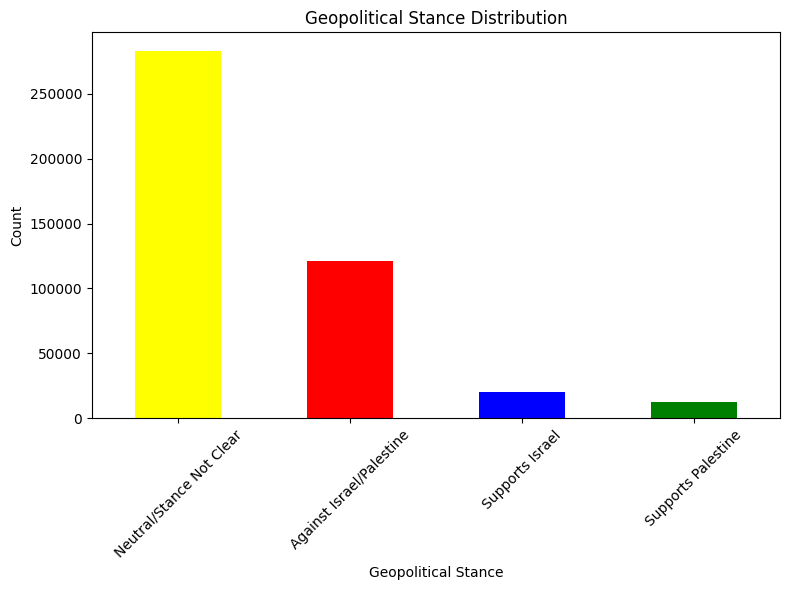

In [50]:
# Assuming 'geopolitical_stance' is a column in your DataFrame df
stance_counts = df['geopolitical_stance'].value_counts()

# Create bar chart using DataFrame values
plt.figure(figsize=(8, 6))
stance_counts.plot(kind='bar', color=['yellow', 'red', 'blue', 'green'])
plt.xlabel('Geopolitical Stance')
plt.ylabel('Count')
plt.title('Geopolitical Stance Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the chart
plt.show()

